<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [5]:
# 기초통계량 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [6]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

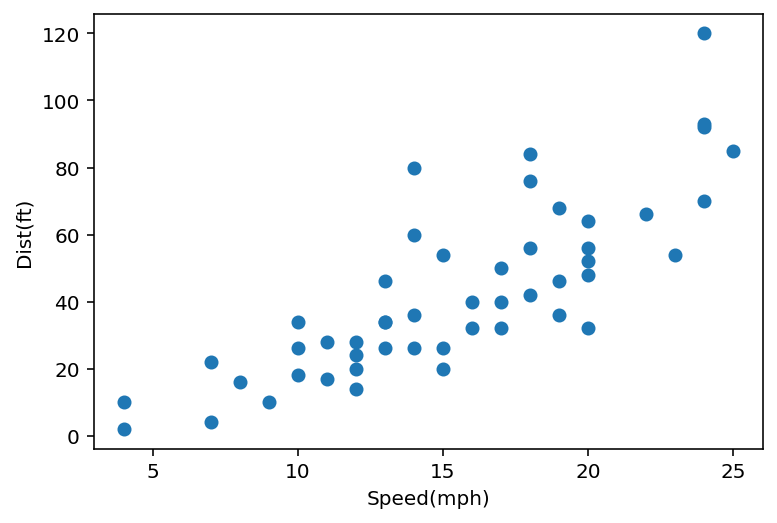

In [7]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)') # 마일 퍼 아워
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [8]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2022)  

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [10]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
# 2단계: 선언하기
model = LinearRegression()

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# 회귀계수 확인
print(model.coef_) # 기울기 == 가중치
print(model.intercept_) # 절편

# y = 3.8 * x -17.0
# dist = 3.8 * spped - 17.0

[3.86309751]
-17.07724665391965


In [14]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [16]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score', r2_score(y_test, y_pred))

MAE: 10.337667304015294
R2-Score 0.7308201428360215


# 5.기타

- 기타 필요한 내용이 있으면 진횅합니다.

> y = ax + b

**1) 회귀식 시각화**

In [17]:
 np.linspace(x_test.min(), x_test.max(), 10)
#    임의의 x값을 만들어, x_test의 최소값부터 최대값 사이의 10개의 숫자를 만들기

array([[ 4.        ],
       [ 6.33333333],
       [ 8.66666667],
       [11.        ],
       [13.33333333],
       [15.66666667],
       [18.        ],
       [20.33333333],
       [22.66666667],
       [25.        ]])

In [18]:
# 선형회귀식
a = model.coef_ # 기울기 == 가중치
b = model.intercept_ # 절편
x = np.linspace(x_test.min(), x_test.max(), 10)
y = a * x + b

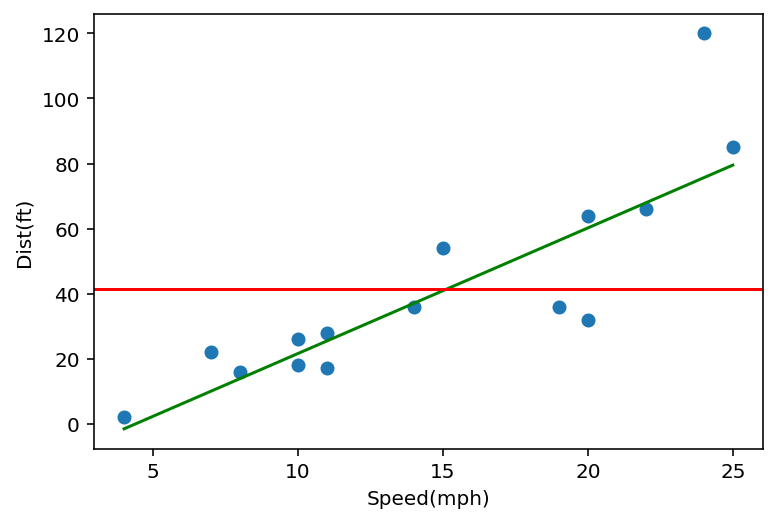

In [22]:
# 시각화
mean_speed = y_test.mean() # 평균값
plt.scatter(x_test, y_test) # (y)
plt.plot(x, y, color='g') # 선형회귀식(y햇)
plt.axhline(mean_speed, color='r') # 평균선(y바)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

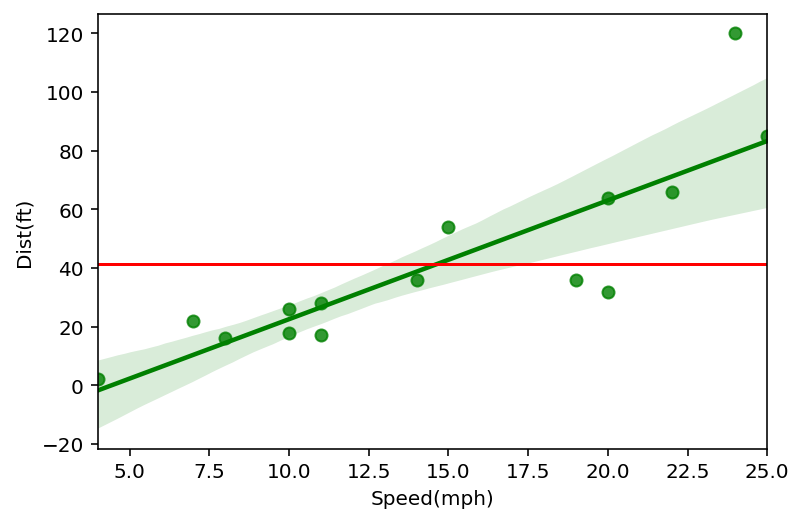

In [33]:
# seaborn 으로 시각화
import seaborn as sns
mean_speed = y_test.mean() # 평균값
sns.regplot(x=x_test, y=y_test, color='g')
plt.axhline(mean_speed, color='r') # 평균선(y바)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

**2) 예측값, 시각값 시각화**

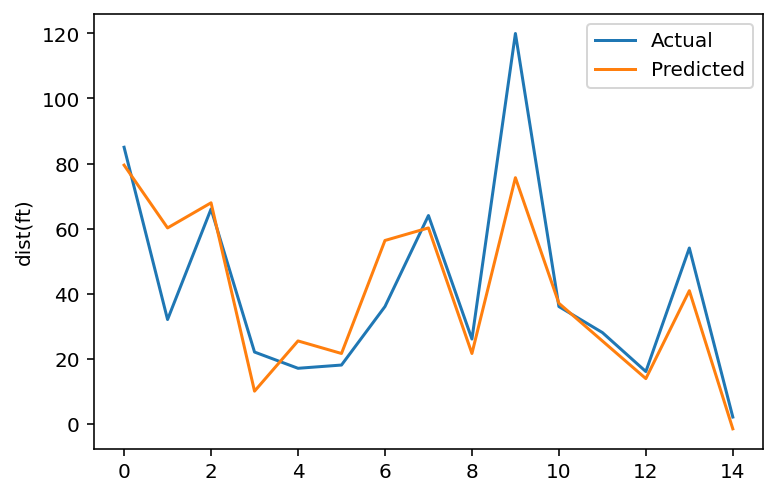

In [35]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('dist(ft)')
plt.show()